<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_15_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98%2C_%EC%B5%9C%EC%A0%81%ED%99%94%ED%95%A8%EC%88%98_%EB%B9%84%EA%B5%90_(%ED%8C%A8%EC%85%98%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [46]:
data = fashion_mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [47]:
X_train = data[0][0]  # X_train
y_train = data[0][1]  # y_train
X_test = data[1][0]  # X_test
y_test = data[1][1]  # y_test

In [48]:
print(X_train.shape)  # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_train.shape)
print(X_test.shape)   # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [49]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [50]:
y_train_one_hot.shape

(60000, 10)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train, 
                                                                  y_train_one_hot,
                                                                  random_state = 3
                                                                  )

In [53]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential  # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성
from tensorflow.keras.layers import Flatten # Flatten: 데이터를 1차원으로 자동으로 펴주는 모듈
from tensorflow.keras.layers import InputLayer,Dense

In [54]:
# 1번 중간층 활성화 함수 sigmoid

# 신경망의 뼈대를 설정
model = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
model.add (Flatten(input_shape = (28,28)))
# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model.add(Dense(500, activation="sigmoid"))

# 중간층
model.add(Dense(500,activation="sigmoid"))   # 하나의 층
model.add(Dense(300, activation="sigmoid"))   # 하나의 층
model.add(Dense(100, activation="sigmoid"))   # 하나의 층


# 출력층
model.add(Dense(10, activation="softmax"))   # 0~9까지의 정답레이블 (10개)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_21 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_22 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_23 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 824,410
Trainable params: 824,410
Non-trainable params: 0
________________________________________________

In [55]:
# 2. 학습/ 평가 방법 설정
model.compile(loss ="categorical_crossentropy",
               optimizer = 'SGD',            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [56]:
h = model.fit(X_train, 
              y_train_one_hot,
              validation_data = (X_val, y_val_one_hot), 
              epochs=30, 
              verbose =1)
# verbose: 학습 결과의 출력 형태를 설정하는 명령 (0: 출력 x, 1: bar 형태 (디폴트 값), 2: bar가 없는 형태로 출력)

Epoch 1/30
1407/1407 [==============================] - 6s 4ms/step - loss: 2.2708 - acc: 0.2119 - val_loss: 2.2117 - val_acc: 0.2966
Epoch 2/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.9783 - acc: 0.3994 - val_loss: 1.6295 - val_acc: 0.4841
Epoch 3/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.4067 - acc: 0.5265 - val_loss: 1.2345 - val_acc: 0.5702
Epoch 4/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.1162 - acc: 0.5910 - val_loss: 1.0147 - val_acc: 0.6139
Epoch 5/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9464 - acc: 0.6466 - val_loss: 0.8866 - val_acc: 0.6805
Epoch 6/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8464 - acc: 0.6851 - val_loss: 0.8073 - val_acc: 0.7014
Epoch 7/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7808 - acc: 0.7107 - val_loss: 0.7545 - val_acc: 0.7116
Epoch 8/30
1407/1407 [==============================] - 5s 4ms

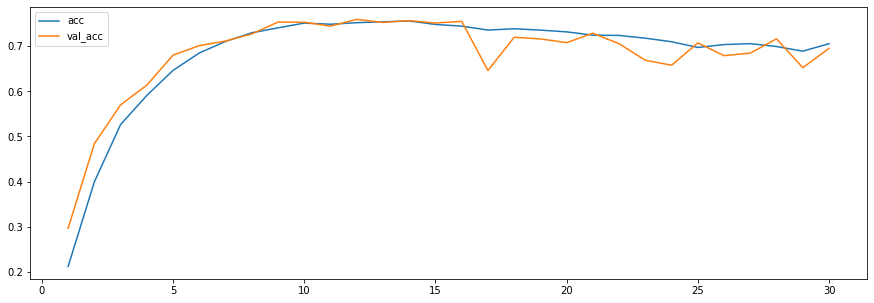

In [57]:
# 시각화

plt.figure(figsize=(15,5))

# train 데이터
plt.plot(range(1,31),
         h.history['acc'],
         label ='acc'
         )
# val 데이터
plt.plot(range(1,31),
         h.history['val_acc'],
         label ='val_acc'
         )



plt.legend()
plt.show()

In [58]:
# 모델 평가
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.8444 - acc: 0.6846


[0.8443911075592041, 0.6845999956130981]

In [59]:
# 2번 중간층 활성화 함수 relu, SGD
# 신경망의 뼈대를 설정
model2 = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
model2.add (Flatten(input_shape = (28,28)))
# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model2.add(Dense(500, activation="relu"))

# 중간층
model2.add(Dense(500,activation="relu"))   # 하나의 층
model2.add(Dense(300, activation="relu"))   # 하나의 층
model2.add(Dense(100, activation="relu"))   # 하나의 층


# 출력층
model2.add(Dense(10, activation="softmax"))   # 0~9까지의 정답레이블 (10개)

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_26 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_27 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_28 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1010      
Total params: 824,410
Trainable params: 824,410
Non-trainable params: 0
________________________________________________

In [60]:
from tensorflow.keras.optimizers import SGD, Adam

In [61]:
# 2. 학습/ 평가 방법 설정
model2.compile(loss ="categorical_crossentropy",
               optimizer = SGD(lr = 0.001),            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [62]:
h2 = model2.fit(X_train, 
              y_train_one_hot,
              validation_data = (X_val, y_val_one_hot), 
              epochs=30,
              batch_size = 128, 
              verbose =1)
# verbose: 학습 결과의 출력 형태를 설정하는 명령 (0: 출력 x, 1: bar 형태 (디폴트 값), 2: bar가 없는 형태로 출력)

Epoch 1/30
352/352 [==============================] - 2s 4ms/step - loss: 4.2417 - acc: 0.7078 - val_loss: 0.7180 - val_acc: 0.7597
Epoch 2/30
352/352 [==============================] - 1s 4ms/step - loss: 0.5867 - acc: 0.8010 - val_loss: 0.5701 - val_acc: 0.8035
Epoch 3/30
352/352 [==============================] - 1s 4ms/step - loss: 0.5059 - acc: 0.8242 - val_loss: 0.5340 - val_acc: 0.8154
Epoch 4/30
352/352 [==============================] - 1s 4ms/step - loss: 0.4563 - acc: 0.8390 - val_loss: 0.5137 - val_acc: 0.8253
Epoch 5/30
352/352 [==============================] - 1s 4ms/step - loss: 0.4238 - acc: 0.8494 - val_loss: 0.5152 - val_acc: 0.8217
Epoch 6/30
352/352 [==============================] - 1s 4ms/step - loss: 0.3971 - acc: 0.8583 - val_loss: 0.4743 - val_acc: 0.8353
Epoch 7/30
352/352 [==============================] - 1s 4ms/step - loss: 0.3777 - acc: 0.8633 - val_loss: 0.4701 - val_acc: 0.8377
Epoch 8/30
352/352 [==============================] - 1s 4ms/step - loss: 0.

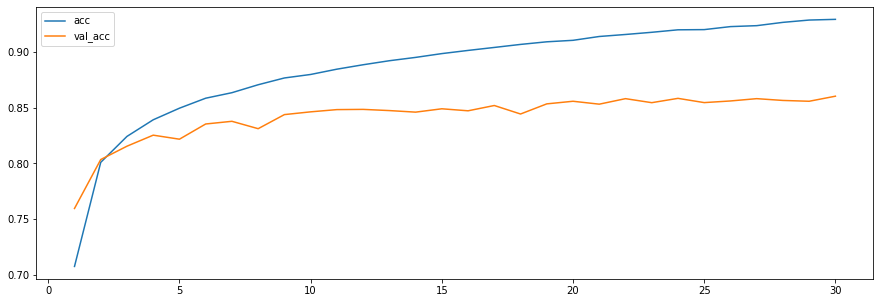

In [63]:
# 시각화
plt.figure(figsize=(15,5))

# train 데이터
plt.plot(range(1,31),
         h2.history['acc'],
         label ='acc'
         )
# val 데이터
plt.plot(range(1,31),
         h2.history['val_acc'],
         label ='val_acc'
         )



plt.legend()
plt.show()

In [64]:
# 모델 평가
model2.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.4705 - acc: 0.8476


[0.4704526960849762, 0.847599983215332]

In [65]:
# 3번 중간층 활성화 함수 relu, 최적화함수 adam

# 신경망의 뼈대를 설정
model3 = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
model3.add (Flatten(input_shape = (28,28)))
# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model3.add(Dense(500, activation="sigmoid"))

# 중간층
model3.add(Dense(500,activation="sigmoid"))   # 하나의 층
model3.add(Dense(300, activation="sigmoid"))   # 하나의 층
model3.add(Dense(100, activation="sigmoid"))   # 하나의 층


# 출력층
model3.add(Dense(10, activation="softmax"))   # 0~9까지의 정답레이블 (10개)

model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_31 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_32 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_33 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1010      
Total params: 824,410
Trainable params: 824,410
Non-trainable params: 0
________________________________________________

In [66]:
# 2. 학습/ 평가 방법 설정
model3.compile(loss ="categorical_crossentropy",
               optimizer = 'Adam',            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [67]:
h3 = model3.fit(X_train, 
              y_train_one_hot,
              validation_data = (X_val, y_val_one_hot), 
              epochs=30, 
              verbose =1)
# verbose: 학습 결과의 출력 형태를 설정하는 명령 (0: 출력 x, 1: bar 형태 (디폴트 값), 2: bar가 없는 형태로 출력)

Epoch 1/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9847 - acc: 0.6158 - val_loss: 0.8286 - val_acc: 0.6819
Epoch 2/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8417 - acc: 0.6721 - val_loss: 0.8646 - val_acc: 0.6427
Epoch 3/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8032 - acc: 0.6851 - val_loss: 0.8016 - val_acc: 0.6941
Epoch 4/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8002 - acc: 0.6904 - val_loss: 0.8587 - val_acc: 0.6745
Epoch 5/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7780 - acc: 0.6941 - val_loss: 0.7154 - val_acc: 0.7367
Epoch 6/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7499 - acc: 0.7144 - val_loss: 0.7103 - val_acc: 0.7300
Epoch 7/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7272 - acc: 0.7182 - val_loss: 0.7098 - val_acc: 0.7311
Epoch 8/30
1407/1407 [==============================] - 6s 4ms

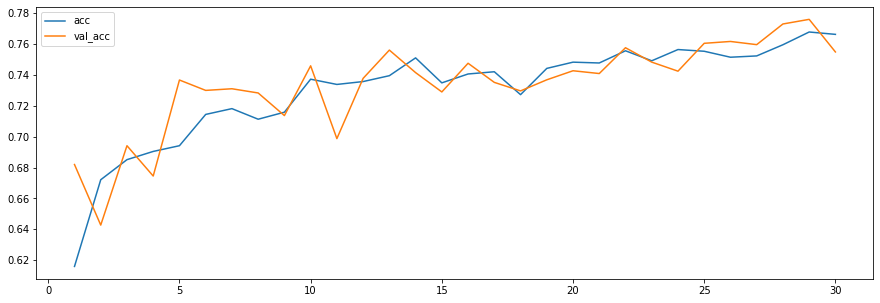

In [68]:
# 시각화

plt.figure(figsize=(15,5))

# train 데이터
plt.plot(range(1,31),
         h3.history['acc'],
         label ='acc'
         )
# val 데이터
plt.plot(range(1,31),
         h3.history['val_acc'],
         label ='val_acc'
         )



plt.legend()
plt.show()

In [69]:
# 모델 평가
model3.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.6420 - acc: 0.7437


[0.6420029997825623, 0.7437000274658203]

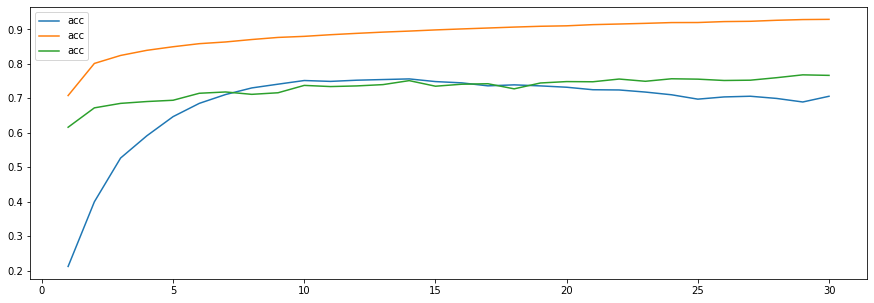

In [70]:
# 3종류 모델 시각화

plt.figure(figsize=(15,5))

plt.plot(range(1,31,1),
         h.history['acc'],
         label='acc'
         )

plt.plot(range(1,31,1),
         h2.history['acc'],
         label='acc'
         )

plt.plot(range(1, 31,1),
         h3.history['acc'],
         label='acc'
         )
plt.legend()
plt.show()